In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Exploring the Numeric Variables-Five number summary

In [ ]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Checking for null values:

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No null values present

## Visualizing the Boxplot

In [ ]:
color_discrete_sequence1=['red','green','blue','magenta']
for i in range(0,len(df.columns)):
    fig=px.box(df,df.columns[i],color_discrete_sequence=[color_discrete_sequence1[i]])
    fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
)
    fig.show()

We can see that there are Outliers in the newspaper columns which need to beremoved for further analysis.

## Removing Outliers:

In [ ]:
Q1=df['Newspaper'].quantile(0.25)
Q3=df['Newspaper'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
new_df=df[(df['Newspaper']<UL) & (df['Newspaper']>LL)]

In [ ]:
color_discrete_sequence1=['red','green','blue','magenta']
for i in range(0,len(new_df.columns)):
    fig=px.box(new_df,new_df.columns[i],color_discrete_sequence=[color_discrete_sequence1[i]])
    fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
)
    fig.show()


As we can se that Outliers has been removed from the Newspaper column

## Checking the Skewness

In [ ]:
new_df.skew()

TV          -0.082332
Radio        0.114842
Newspaper    0.650112
Sales       -0.079676
dtype: float64

All the values of skewness are in range of -0.5 to +0.5 except of the Newspaper column so we need to correct them

## Pairplot

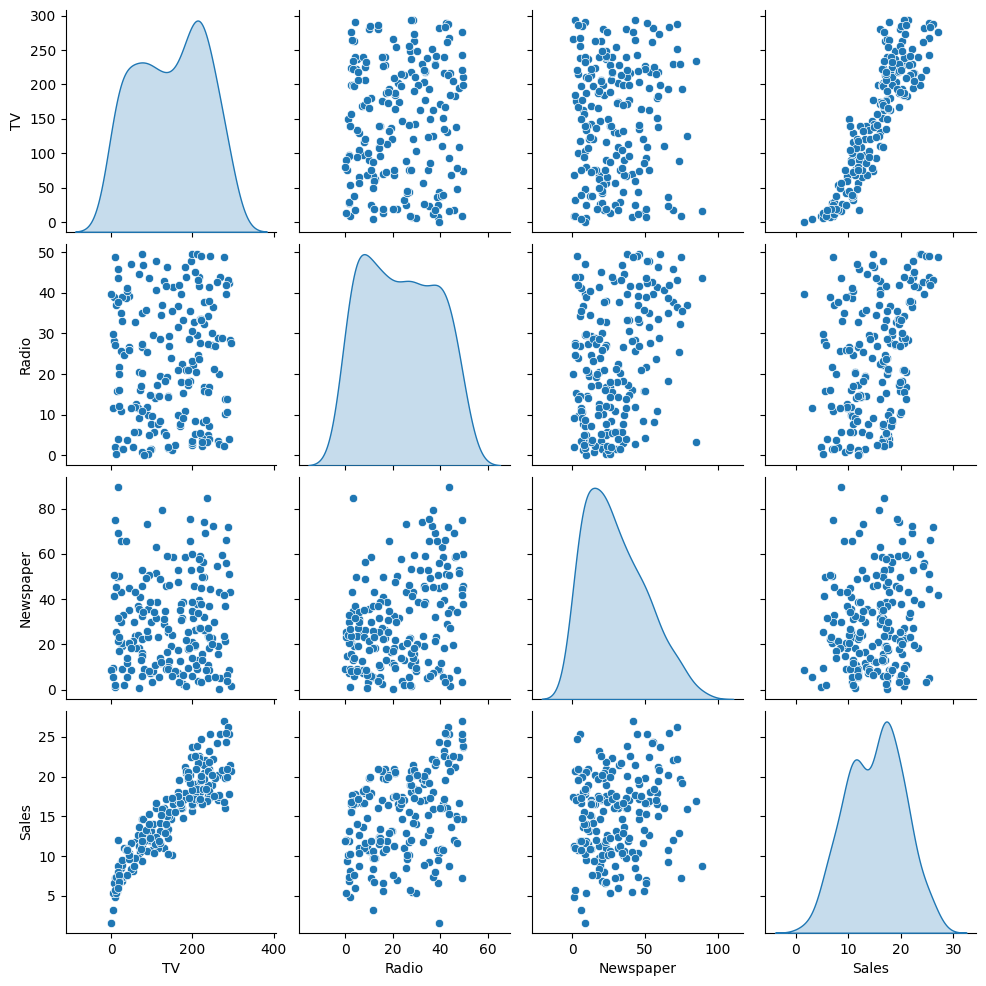

In [ ]:
sns.pairplot(new_df,x_vars=['TV','Radio','Newspaper','Sales'],y_vars=['TV','Radio','Newspaper','Sales'],diag_kind='kde')
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
df1=new_df.copy(deep=True)
pt=PowerTransformer(standardize=False)
pt_sc=pt.fit_transform(df1)
pt_sc=pd.DataFrame(pt_sc,columns=df1.columns)
pt_sc

,TV,Radio,Newspaper,Sales
0,74.528071,13.511171,11.824192,21.534637
1,21.440819,13.863920,9.523328,10.204882
2,10.217248,15.358318,11.832691,11.760023
3,54.433660,14.326313,10.870611,16.122918
4,62.182226,5.716876,10.861248,17.477483
...,...,...,...,...
193,19.060578,2.565951,5.004410,7.477145
194,38.010290,3.189135,3.639473,13.700911
195,61.196719,5.133962,3.138483,14.476419
196,87.171019,14.486108,11.565875,24.812761


## After Power Transformer

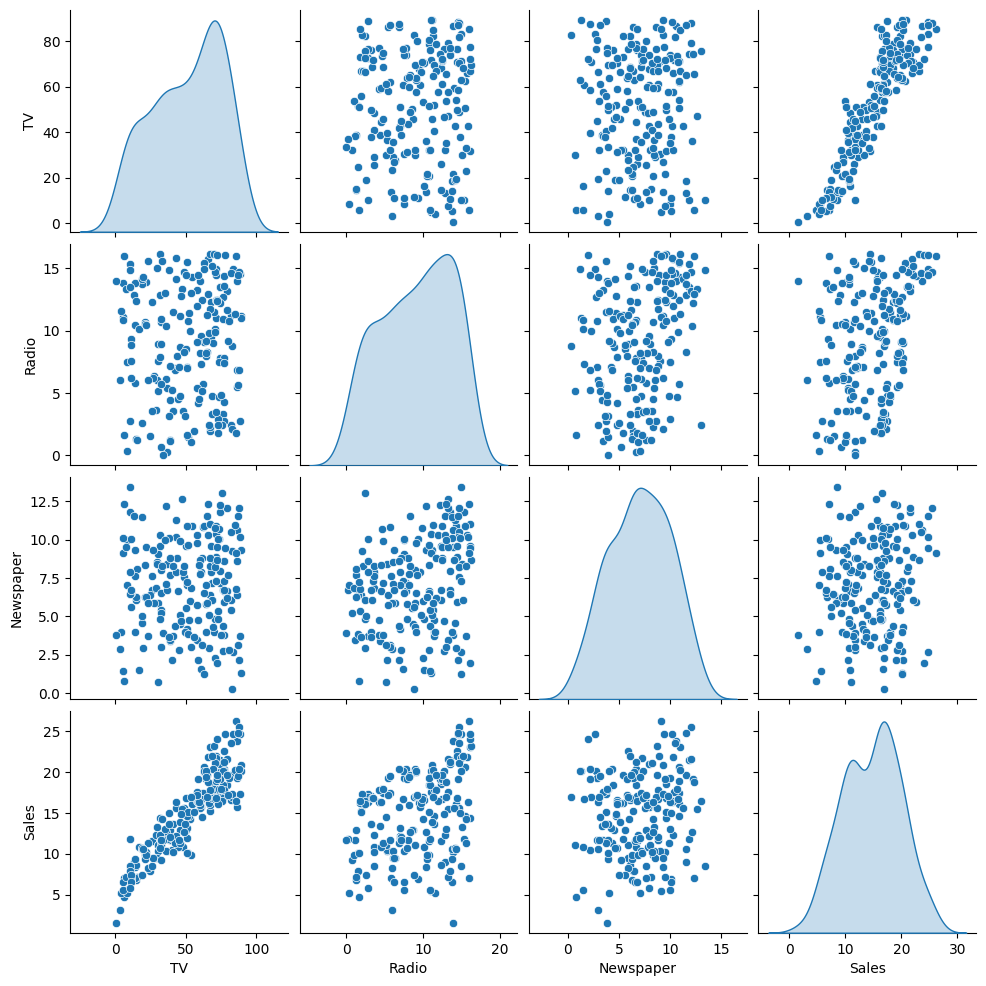

In [ ]:
sns.pairplot(pt_sc,x_vars=['TV','Radio','Newspaper','Sales'],y_vars=['TV','Radio','Newspaper','Sales'],diag_kind='kde')
plt.show()

In [ ]:
pt_sc.skew()

TV          -0.320682
Radio       -0.236668
Newspaper   -0.101288
Sales       -0.088101
dtype: float64

Skewness has been removed using power transformer.

## Dependent and Independent Variable

In [ ]:
X=pt_sc.drop(['Sales'],axis=1)
y=pt_sc['Sales']

## Splitting the Data into Train Test Split.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=48)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(138, 3)
(60, 3)
(138,)
(60,)


# Visualizing the results

## TV Advertising Vs Sales

In [ ]:
fig=px.scatter(pt_sc,x=pt_sc['TV'], y=pt_sc['Sales'],trendline='ols',trendline_color_override='red')
fig.show()
results = px.get_trendline_results(fig)
print(results)


                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


In [ ]:
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     905.6
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           2.09e-75
Time:                        17:40:09   Log-Likelihood:                -432.55
No. Observations:                 198   AIC:                             869.1
Df Residuals:                     196   BIC:                             875.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2374      0.352     14.893      0.000       4.544       5.931
x1             0.1870      0.006     30.093      0.000       0.175       0.199
==============================================================================
Omnibus:                        0.497   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.454
Skew:                           0.116   Prob(JB):                        0.797
Kurtosis:                       2.970   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 For **Advertising** data, the least square fit for the regression of sales on **TV** is shown.

## Radio Advertising Vs Sales

In [ ]:
fig=px.scatter(pt_sc,x=pt_sc['Radio'], y=pt_sc['Sales'],trendline='ols',trendline_color_override='magenta')
fig.show()
results = px.get_trendline_results(fig)
print(results)


                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


In [ ]:
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     25.97
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           8.14e-07
Time:                        17:40:10   Log-Likelihood:                -591.14
No. Observations:                 198   AIC:                             1186.
Df Residuals:                     196   BIC:                             1193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2959      0.761     14.853      0.000       9.796      12.796
x1             0.3812      0.075      5.096      0.000       0.234       0.529
==============================================================================
Omnibus:                       10.360   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.716
Skew:                          -0.429   Prob(JB):                       0.0128
Kurtosis:                       2.433   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For **Advertising** data, the least square fit for the regression of sales on **Radio** is shown.

## Newspaper Advertising vs Sales

In [ ]:
fig=px.scatter(pt_sc,x=pt_sc['Newspaper'], y=pt_sc['Sales'],trendline='ols',trendline_color_override='green')
fig.show()
results = px.get_trendline_results(fig)
print(results)


                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


In [ ]:
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.315
Date:                Fri, 15 Sep 2023   Prob (F-statistic):             0.0702
Time:                        17:40:10   Log-Likelihood:                -601.80
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1995      0.929     14.215      0.000      11.368      15.031
x1             0.2209      0.121      1.821      0.070      -0.018       0.460
==============================================================================
Omnibus:                        9.361   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                4.523
Skew:                          -0.105   Prob(JB):                        0.104
Kurtosis:                       2.290   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For **Advertising** data, the least square fit for the regression of sales on **Newspaper** is shown.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

fig = px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=['blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting Sales'
)
fig.show()

## Fitting Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR_model = LR.fit(xtrain,ytrain)
LR_model

LinearRegression()

In [ ]:
y_pred = LR_model.predict(xtest)
y_pred_train = LR_model.predict(xtrain)

In [ ]:
MLR_R2=r2_score(ytest,y_pred)
MLR_R2

0.8682625169350203

In [ ]:
r2_score(ytrain,y_pred_train)

0.9294015988275449

In [ ]:
MLR_rmse=np.sqrt(mean_squared_error(ytest,y_pred))
print('RMSE = ',MLR_rmse)

RMSE =  1.76793794040153


In [ ]:
MLR_mape=mean_absolute_percentage_error(ytest,y_pred)
print('MAPE = ',MLR_mape)

MAPE =  0.1497682329497506


In [ ]:
MLR_mae=mean_absolute_error(ytest,y_pred)
print('MAE =',MLR_mae)

MAE = 1.3471668574350268


In [ ]:
cols = ['Model', 'R-squared','RMSE','MAPE','MAE']

In [ ]:
result_tabulation = pd.DataFrame(columns = cols)

In [ ]:
OLS_metrics = pd.Series({'Model': "Linear Regression(OLS)",
                 'R-squared' : MLR_R2, 'RMSE' :MLR_rmse, 'MAPE': MLR_mape, 'MAE': MLR_mae})

In [ ]:
result_tabulation = result_tabulation.append(OLS_metrics , ignore_index = True)

In [ ]:
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.868263,1.767938,0.149768,1.347167


## Linear Regression using SGD

In [ ]:
from sklearn.linear_model import SGDRegressor

SGD_model = SGDRegressor(loss="squared_error",alpha = 0.1, max_iter = 1000)

SGD_model.fit(xtrain, ytrain)

SGDRegressor(alpha=0.1)

In [ ]:
SGD_y_pred = LR_model.predict(xtest)
SGD_y_pred_train = LR_model.predict(xtrain)

In [ ]:
SGD_R2=r2_score(ytest,SGD_y_pred)
SGD_R2

0.8682625169350203

In [ ]:
r2_score(ytrain,SGD_y_pred_train)

0.9294015988275449

In [ ]:
SGD_rmse=np.sqrt(mean_squared_error(ytest,SGD_y_pred))
print('RMSE = ',SGD_rmse)

RMSE =  1.76793794040153


In [ ]:
SGD_mape=mean_absolute_percentage_error(ytest,SGD_y_pred)
print('MAPE = ',SGD_mape)

MAPE =  0.1497682329497506


In [ ]:
SGD_mae=mean_absolute_error(ytest,SGD_y_pred)
print('MAE =',SGD_mae)

MAE = 1.3471668574350268


In [ ]:
SGD_metrics = pd.Series({'Model': "Linear Regression(SGD)",
                 'R-squared' : SGD_R2, 'RMSE' :SGD_rmse, 'MAPE': SGD_mape, 'MAE': SGD_mae})

In [ ]:
result_tabulation = result_tabulation.append(SGD_metrics , ignore_index = True)
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.868263,1.767938,0.149768,1.347167
1,Linear Regression(SGD),0.868263,1.767938,0.149768,1.347167


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT_model = DT.fit(xtrain,ytrain)
DT_model

DecisionTreeRegressor()

In [ ]:
dt_y_pred = DT_model.predict(xtest)
dt_y_pred_train=DT_model.predict(xtrain)

In [ ]:
dt_y_pred

array([ 7.47714469, 11.6628931 , 11.6628931 , 16.70359101, 16.31650024,
       16.12291769, 15.63885058, 11.6628931 , 15.63885058, 21.63112726,
       20.66601051, 16.31650024, 15.63885058,  9.91302672, 11.37145277,
        3.16804051, 22.59577091, 16.70359101, 15.7356768 , 23.75274654,
       16.02611699, 22.59577091, 13.3129825 , 24.04189216, 17.76759538,
       21.14862933, 10.20488219, 10.20488219,  9.52374609, 17.96097506,
       11.6628931 ,  5.22897148, 15.63885058, 16.70359101, 18.44432557,
       11.6628931 ,  7.96490016,  9.32904409, 15.7356768 ,  9.03691173,
       17.76759538, 10.59388735, 15.7356768 , 16.02611699, 16.31650024,
       19.3140108 , 17.47748284,  3.16804051, 16.89709978, 12.05136062,
       17.96097506, 15.7356768 , 16.41328217, 20.37638006, 23.75274654,
       16.41328217, 15.25148052, 10.20488219, 17.47748284, 17.96097506])

In [ ]:
DT_R2=r2_score(ytest,dt_y_pred)
DT_R2

0.8676248592569598

In [ ]:
r2_score(ytrain,dt_y_pred_train)

1.0

In [ ]:
DT_rmse=np.sqrt(mean_squared_error(ytest,dt_y_pred))
print('RMSE = ',DT_rmse)

RMSE =  1.7722115088794401


In [ ]:
DT_mape=mean_absolute_percentage_error(ytest,dt_y_pred)
print('MAPE = ',DT_mape)

MAPE =  0.11102127580106762


In [ ]:
DT_mae=mean_absolute_error(ytest,dt_y_pred)
print('MAE =',DT_mae)

MAE = 1.3340371813473382


In [ ]:
tree_max_depth = DT_model.tree_.max_depth
print("Maximum depth of the decision tree:", tree_max_depth)

Maximum depth of the decision tree: 13


In [ ]:
Decision_Tree = pd.Series({'Model': "Decision Tree",
                 'R-squared' : DT_R2, 'RMSE' :DT_rmse, 'MAPE': DT_mape, 'MAE': DT_mae})

In [ ]:
result_tabulation = result_tabulation.append(Decision_Tree , ignore_index = True)

In [ ]:
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.868263,1.767938,0.149768,1.347167
1,Linear Regression(SGD),0.868263,1.767938,0.149768,1.347167
2,Decision Tree,0.867625,1.772212,0.111021,1.334037


## Ridge Regularization

In [ ]:
from sklearn.linear_model import Ridge

model_ridge= Ridge(alpha=1.0)  # Increase alpha for stronger regularization
model_ridge.fit(xtrain, ytrain)

Ridge()

In [ ]:
ridge_y_pred = model_ridge.predict(xtest)
ridge_y_pred_train=model_ridge.predict(xtrain)

In [ ]:
Ridge_R2=r2_score(ytest,ridge_y_pred)
Ridge_R2

0.8682778893157246

In [ ]:
r2_score(ytrain,ridge_y_pred_train)

0.9294015854170083

In [ ]:
Ridge_rmse=np.sqrt(mean_squared_error(ytest,ridge_y_pred))
print('RMSE = ',Ridge_rmse)

RMSE =  1.7678347874972655


In [ ]:
Ridge_mape=mean_absolute_percentage_error(ytest,ridge_y_pred)
print('MAPE = ',Ridge_mape)

MAPE =  0.14975185991387885


In [ ]:
Ridge_mae=mean_absolute_error(ytest,ridge_y_pred)
print('MAE =',Ridge_mae)

MAE = 1.3471458120864324


In [ ]:
Ridge = pd.Series({'Model': "Ridge Regularization",
                 'R-squared' : Ridge_R2, 'RMSE' :Ridge_rmse, 'MAPE': Ridge_mape, 'MAE': Ridge_mae})

In [ ]:
result_tabulation = result_tabulation.append(Ridge , ignore_index = True)
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.868263,1.767938,0.149768,1.347167
1,Linear Regression(SGD),0.868263,1.767938,0.149768,1.347167
2,Decision Tree,0.867625,1.772212,0.111021,1.334037
3,Ridge Regularization,0.868278,1.767835,0.149752,1.347146


## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
Param = [{"max_depth":range(0,50),"min_samples_split" : [20,10]}]
GS = GridSearchCV(DT_model,Param,cv = 5,scoring='neg_mean_squared_error')

In [ ]:
GS.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': range(0, 50),
                          'min_samples_split': [20, 10]}],
             scoring='neg_mean_squared_error')

In [ ]:
GS.best_params_

{'max_depth': 6, 'min_samples_split': 10}

In [ ]:
GS.best_score_

-2.5908244098499003

In [ ]:
# best_par = {'max_depth': 6, 'min_samples_split': 10}
DT_tun = DecisionTreeRegressor(max_depth= 6 ,min_samples_split = 10)
DT_tun_mod = DT_tun.fit(xtrain,ytrain)

In [ ]:
DT_t_pred =DT_tun_mod.predict(xtest)

In [ ]:
DT_Tunned_R2=r2_score(ytest,DT_t_pred)
DT_Tunned_R2

0.8510594908895893

In [ ]:
DT_Tunned_RMSE=np.sqrt(mean_squared_error(ytest,DT_t_pred))
DT_Tunned_RMSE

1.8798307616914498

In [ ]:
DT_Tunned_MAPE=mean_absolute_percentage_error(ytest,DT_t_pred)
DT_Tunned_MAPE

0.13565394652817558

In [ ]:
DT_Tunned_mae=mean_absolute_error(ytest,DT_t_pred)
DT_Tunned_mae

1.3305631882049245

In [ ]:
Decision_Tree_tunned = pd.Series({'Model': "Decision Tree Tunned",
                 'R-squared' : DT_Tunned_R2, 'RMSE' :DT_Tunned_RMSE, 'MAPE': DT_Tunned_MAPE, 'MAE': DT_Tunned_mae})

In [ ]:
result_tabulation = result_tabulation.append(Decision_Tree_tunned , ignore_index = True)

In [ ]:
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.868263,1.767938,0.149768,1.347167
1,Linear Regression(SGD),0.868263,1.767938,0.149768,1.347167
2,Decision Tree,0.867625,1.772212,0.111021,1.334037
3,Ridge Regularization,0.868278,1.767835,0.149752,1.347146
4,Decision Tree Tunned,0.851059,1.879831,0.135654,1.330563


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF_model = RF.fit(xtrain,ytrain)
RF_model

RandomForestRegressor()

In [ ]:
RF_y_pred = RF_model.predict(xtest)
RF_y_pred_train = RF_model.predict(xtrain)

In [ ]:
RF_R2=r2_score(ytest,RF_y_pred)
RF_R2

0.9093922760461126

In [ ]:
r2_score(ytrain,RF_y_pred_train)

0.9939282695370177

In [ ]:
RF_rmse=np.sqrt(mean_squared_error(ytest,RF_y_pred))
print('MSE = ',RF_rmse)

MSE =  1.4662058424365538


In [ ]:
RF_mape=mean_absolute_percentage_error(ytest,RF_y_pred)
print('MAPE = ',RF_mape)

MAPE =  0.10854320936377189


In [ ]:
RF_mae=mean_absolute_error(ytest,RF_y_pred)
print('MAE =',RF_mae)

MAE = 0.9979530176819762


In [ ]:
Random_Forest = pd.Series({'Model': "Random Forest",
                 'R-squared' : RF_R2, 'RMSE' :RF_rmse, 'MAPE': RF_mape, 'MAE': RF_mae})

In [ ]:
result_tabulation = result_tabulation.append( Random_Forest, ignore_index = True)

In [ ]:
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.868263,1.767938,0.149768,1.347167
1,Linear Regression(SGD),0.868263,1.767938,0.149768,1.347167
2,Decision Tree,0.867625,1.772212,0.111021,1.334037
3,Ridge Regularization,0.868278,1.767835,0.149752,1.347146
4,Decision Tree Tunned,0.851059,1.879831,0.135654,1.330563
5,Random Forest,0.909392,1.466206,0.108543,0.997953


## Neural Networks

In [ ]:
from sklearn.neural_network import MLPRegressor
NN = MLPRegressor()
NN_model = NN.fit(xtrain,ytrain)
NN_model

MLPRegressor()

In [ ]:
NN_y_pred = NN_model.predict(xtest)
NN_y_pred_train = NN_model.predict(xtrain)

In [ ]:
NN_R2=r2_score(ytest,NN_y_pred)
NN_R2

0.5005013561100949

In [ ]:
r2_score(ytrain,NN_y_pred_train)

0.6601262191919898

In [ ]:
NN_rmse=np.sqrt(mean_squared_error(ytest,NN_y_pred))
print('MSE = ',NN_rmse)

MSE =  3.442543937308455


In [ ]:
NN_mape=mean_absolute_percentage_error(ytest,NN_y_pred)
print('MAPE = ',NN_mape)

MAPE =  0.2044192619810904


In [ ]:
NN_mae=mean_absolute_error(ytest,NN_y_pred)
print('MAE =',NN_mae)

MAE = 2.8155339201692677


In [ ]:
Neural_Network = pd.Series({'Model': "Neural Network",
                 'R-squared' : NN_R2, 'RMSE' :NN_rmse, 'MAPE': NN_mape, 'MAE': NN_mae})

In [ ]:
result_tabulation = result_tabulation.append( Neural_Network, ignore_index = True)
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.868263,1.767938,0.149768,1.347167
1,Linear Regression(SGD),0.868263,1.767938,0.149768,1.347167
2,Decision Tree,0.867625,1.772212,0.111021,1.334037
3,Ridge Regularization,0.868278,1.767835,0.149752,1.347146
4,Decision Tree Tunned,0.851059,1.879831,0.135654,1.330563
5,Random Forest,0.909392,1.466206,0.108543,0.997953
6,Neural Network,0.500501,3.442544,0.204419,2.815534


## Support vector Machine

In [ ]:
from sklearn.svm import LinearSVR
SVR_mod = LinearSVR()
SVR_model = SVR_mod.fit(xtrain,ytrain)
SVR_model

LinearSVR()

In [ ]:
SVR_y_pred = SVR_model.predict(xtest)
SVR_y_pred_train = SVR_model.predict(xtrain)

In [ ]:
SVR_R2=r2_score(ytest,SVR_y_pred)
SVR_R2

0.8653537756904893

In [ ]:
r2_score(ytrain,SVR_y_pred_train)

0.9258257740377414

In [ ]:
SVR_rmse=np.sqrt(mean_squared_error(ytest,SVR_y_pred))
print('MSE = ',SVR_rmse)

MSE =  1.7873492604401233


In [ ]:
SVR_mape=mean_absolute_percentage_error(ytest,SVR_y_pred)
print('MAPE = ',SVR_mape)

MAPE =  0.14608131423527795


In [ ]:
SVR_mae=mean_absolute_error(ytest,SVR_y_pred)
print('MAE =',SVR_mae)

MAE = 1.3538435133643967


In [ ]:
SVR = pd.Series({'Model': "Support Vector",
                 'R-squared' : SVR_R2, 'RMSE' :SVR_rmse, 'MAPE': SVR_mape, 'MAE': SVR_mae})

In [ ]:
result_tabulation=result_tabulation.append(SVR,ignore_index=True)
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.868263,1.767938,0.149768,1.347167
1,Linear Regression(SGD),0.868263,1.767938,0.149768,1.347167
2,Decision Tree,0.867625,1.772212,0.111021,1.334037
3,Ridge Regularization,0.868278,1.767835,0.149752,1.347146
4,Decision Tree Tunned,0.851059,1.879831,0.135654,1.330563
5,Random Forest,0.909392,1.466206,0.108543,0.997953
6,Neural Network,0.500501,3.442544,0.204419,2.815534
7,Support Vector,0.865354,1.787349,0.146081,1.353844


## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN_model = KNN.fit(xtrain,ytrain)
KNN_model

KNeighborsRegressor()

In [ ]:
KNN_y_pred = KNN_model.predict(xtest)
KNN_y_pred_train = KNN_model.predict(xtrain)

In [ ]:
KNN_R2=r2_score(ytest,KNN_y_pred)
KNN_R2

0.8883675537326554

In [ ]:
r2_score(ytrain,KNN_y_pred_train)

0.9503928008081447

In [ ]:
KNN_rmse=np.sqrt(mean_squared_error(ytest,KNN_y_pred))
print('MSE = ',KNN_rmse)

MSE =  1.627449630449519


In [ ]:
KNN_mape=mean_absolute_percentage_error(ytest,KNN_y_pred)
print('MAPE = ',KNN_mape)

MAPE =  0.12160814908229355


In [ ]:
KNN_mae=mean_absolute_error(ytest,KNN_y_pred)
print('MAE =',KNN_mae)

MAE = 1.267541293274412


In [ ]:
KNN = pd.Series({'Model': "KNN",
                 'R-squared' : KNN_R2, 'RMSE' :KNN_rmse, 'MAPE': KNN_mape, 'MAE': KNN_mae})

In [ ]:
result_tabulation=result_tabulation.append(KNN,ignore_index=True)
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.868263,1.767938,0.149768,1.347167
1,Linear Regression(SGD),0.868263,1.767938,0.149768,1.347167
2,Decision Tree,0.867625,1.772212,0.111021,1.334037
3,Ridge Regularization,0.868278,1.767835,0.149752,1.347146
4,Decision Tree Tunned,0.851059,1.879831,0.135654,1.330563
5,Random Forest,0.909392,1.466206,0.108543,0.997953
6,Neural Network,0.500501,3.442544,0.204419,2.815534
7,Support Vector,0.865354,1.787349,0.146081,1.353844
8,KNN,0.888368,1.627450,0.121608,1.267541


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_GBR = GradientBoostingRegressor(
    loss='squared_error',              # Loss function: 'ls' for least squares regression
    n_estimators=100,       # Number of boosting stages (trees)
    learning_rate=0.1,      # Step size shrinking to prevent overfitting
    max_depth=3,            # Maximum depth of individual trees
    min_samples_split=2,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
    random_state=42         # Seed for reproducibility
)


In [ ]:
GBR_model=model_GBR.fit(xtrain, ytrain)

In [ ]:
GBR_y_pred = model_GBR.predict(xtest)
GBR_y_pred_train = model_GBR.predict(xtrain)

In [ ]:
GBR_R2=r2_score(ytest,GBR_y_pred)
GBR_R2

0.9175053208919075

In [ ]:
r2_score(ytrain,GBR_y_pred_train)

0.9965526017769861

In [ ]:
GBR_rmse=np.sqrt(mean_squared_error(ytest,GBR_y_pred))
print('RMSE = ',GBR_rmse)

RMSE =  1.3990244481294947


In [ ]:
GBR_mape=mean_absolute_percentage_error(ytest,GBR_y_pred)
print('MAPE = ',GBR_mape)

MAPE =  0.10931109854344663


In [ ]:
GBR_mae=mean_absolute_error(ytest,GBR_y_pred)
print('MAE =',GBR_mae)

MAE = 1.0478104320587687


In [ ]:
GBR= pd.Series({'Model': "Gradient Boosting Regressor",
                 'R-squared' : GBR_R2, 'RMSE' :GBR_rmse, 'MAPE': GBR_mape, 'MAE': GBR_mae})

In [ ]:
result_tabulation=result_tabulation.append(GBR,ignore_index=True)
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.868263,1.767938,0.149768,1.347167
1,Linear Regression(SGD),0.868263,1.767938,0.149768,1.347167
2,Decision Tree,0.867625,1.772212,0.111021,1.334037
3,Ridge Regularization,0.868278,1.767835,0.149752,1.347146
4,Decision Tree Tunned,0.851059,1.879831,0.135654,1.330563
5,Random Forest,0.909392,1.466206,0.108543,0.997953
6,Neural Network,0.500501,3.442544,0.204419,2.815534
7,Support Vector,0.865354,1.787349,0.146081,1.353844
8,KNN,0.888368,1.627450,0.121608,1.267541
9,Gradient Boosting Regressor,0.917505,1.399024,0.109311,1.047810


## XG Boosting

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
model_XGBR = XGBRegressor(
    n_estimators=100,         # Number of boosting rounds (trees)
    learning_rate=0.1,        # Step size shrinking to prevent overfitting
    max_depth=3,              # Maximum depth of individual trees
    min_child_weight=1,       # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,                  # Minimum loss reduction required to make a further partition on a leaf node
    subsample=1,              # Fraction of samples used for fitting the trees
    colsample_bytree=1,       # Fraction of features used for fitting the trees
    reg_alpha=0,              # L1 regularization term on weights
    reg_lambda=1,             # L2 regularization term on weights
    random_state=42           # Seed for reproducibility
)

In [ ]:
XGB_model=model_XGBR.fit(xtrain, ytrain)

In [ ]:
XGBR_y_pred = model_XGBR.predict(xtest)
XGBR_y_pred_train = model_XGBR.predict(xtrain)

In [ ]:
XGBR_R2=r2_score(ytest,XGBR_y_pred)
XGBR_R2

0.9141340585779072

In [ ]:
r2_score(ytrain,XGBR_y_pred_train)

0.9944410962836094

In [ ]:
XGBR_rmse=np.sqrt(mean_squared_error(ytest,XGBR_y_pred))
print('RMSE = ',XGBR_rmse)

RMSE =  1.4273247712721004


In [ ]:
XGBR_mape=mean_absolute_percentage_error(ytest,XGBR_y_pred)
print('MAPE = ',XGBR_mape)

MAPE =  0.10966017336507032


In [ ]:
XGBR_mae=mean_absolute_error(ytest,XGBR_y_pred)
print('MAE =',XGBR_mae)

MAE = 1.0733139618666985


In [ ]:
XGBR= pd.Series({'Model': "XG Boosting Regressor",
                 'R-squared' : XGBR_R2, 'RMSE' :XGBR_rmse, 'MAPE': XGBR_mape, 'MAE': XGBR_mae})

In [ ]:
result_tabulation=result_tabulation.append(XGBR,ignore_index=True)
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.868263,1.767938,0.149768,1.347167
1,Linear Regression(SGD),0.868263,1.767938,0.149768,1.347167
2,Decision Tree,0.867625,1.772212,0.111021,1.334037
3,Ridge Regularization,0.868278,1.767835,0.149752,1.347146
4,Decision Tree Tunned,0.851059,1.879831,0.135654,1.330563
5,Random Forest,0.909392,1.466206,0.108543,0.997953
6,Neural Network,0.500501,3.442544,0.204419,2.815534
7,Support Vector,0.865354,1.787349,0.146081,1.353844
8,KNN,0.888368,1.627450,0.121608,1.267541
9,Gradient Boosting Regressor,0.917505,1.399024,0.109311,1.047810
